<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [34]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [35]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [36]:
len(X_train)

60000

In [37]:
len(X_test)

10000

In [38]:
X_train[0].shape

(28, 28)

In [39]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

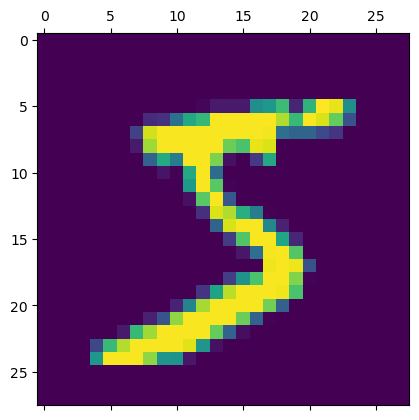

In [40]:
plt.matshow(X_train[0])

In [41]:
y_train[0]

5


Normalizing pixel values is a common preprocessing step in machine learning, especially for tasks involving image data. In the context of image processing, pixel values usually range from 0 to 255, where 0 represents black and 255 represents white. Normalizing the pixel values to a scale between 0 and 1 has several advantages:


In [42]:
X_train = X_train / 255
X_test = X_test / 255

In [43]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [44]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [45]:
X_train_flattened.shape

(60000, 784)

In [46]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

In [47]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

custom_adadelta_optimizer = keras.optimizers.Adadelta(learning_rate=1.0)
model.compile(optimizer=custom_adadelta_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1572/1875 [========================>.....] - ETA: 0s - loss: 0.4850 - accuracy: 0.8743

In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 865us/step - loss: 0.2654 - accuracy: 0.9274


[0.2654150724411011, 0.9273999929428101]

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 901us/step


array([3.4707880e-03, 1.5729475e-08, 1.1183824e-02, 9.6840400e-01,
       1.0588237e-03, 8.3251849e-02, 3.3497155e-08, 9.9979007e-01,
       4.7629431e-02, 5.9330642e-01], dtype=float32)

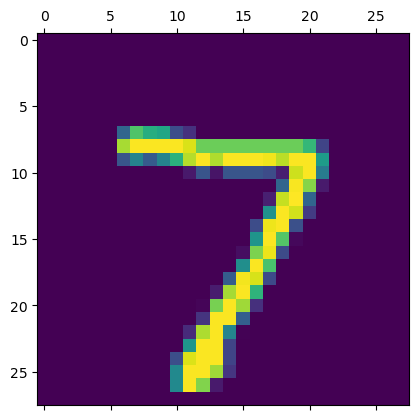

In [ ]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1112,    4,    2,    0,    1,    4,    2,   10,    0],
       [   4,    8,  943,   17,    9,    3,   12,    8,   24,    4],
       [   2,    0,   18,  937,    0,   17,    2,    9,   16,    9],
       [   1,    1,    6,    2,  913,    0,    9,    4,    8,   38],
       [   9,    2,    3,   42,   10,  773,   13,    8,   25,    7],
       [  13,    3,    9,    1,    7,   12,  910,    1,    2,    0],
       [   1,    6,   24,    7,    6,    1,    0,  947,    2,   34],
       [   7,    9,    9,   37,    9,   21,   10,   12,  851,    9],
       [  10,    8,    1,   12,   24,    5,    0,   20,    5,  924]])>

Text(95.72222222222221, 0.5, 'Truth')

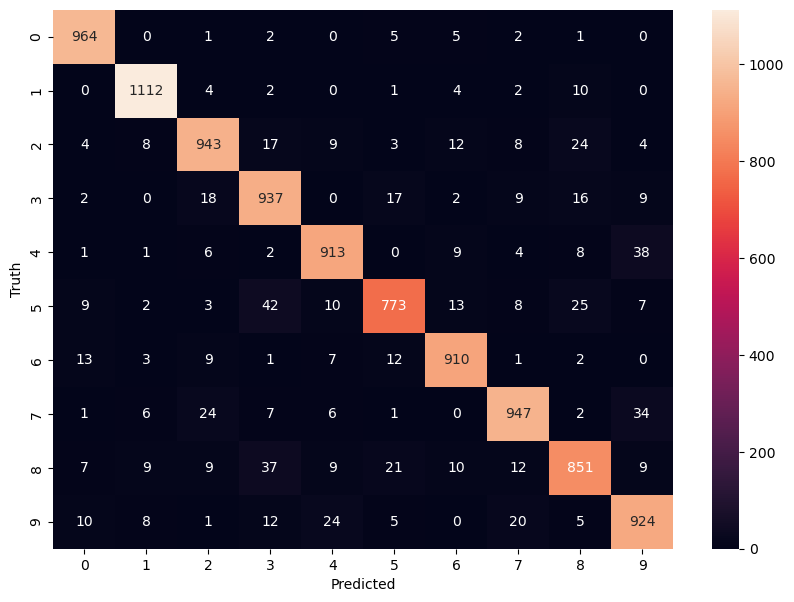

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

custom_adadelta_optimizer = keras.optimizers.Adadelta(learning_rate=1.0)
model.compile(optimizer=custom_adadelta_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2542 - accuracy: 0.9249
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1144 - accuracy: 0.9661
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0838 - accuracy: 0.9750
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0662 - accuracy: 0.9795
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0554 - accuracy: 0.9830
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0464 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0400 - accuracy: 0.9885
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0344 - accuracy: 0.9901
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0301 - accuracy: 0.9912
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.026

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0798 - accuracy: 0.9784


[0.07979186624288559, 0.9783999919891357]

313/313 [==============================] - 0s 840us/step


Text(95.72222222222221, 0.5, 'Truth')

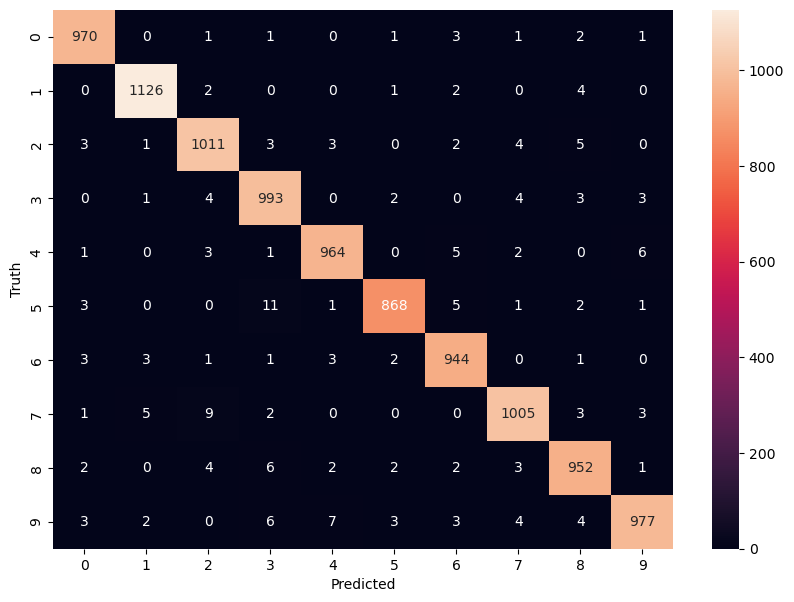

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

custom_adadelta_optimizer = keras.optimizers.Adadelta(learning_rate=1.0)
model.compile(optimizer=custom_adadelta_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2523 - accuracy: 0.9255
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1179 - accuracy: 0.9643
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0854 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0681 - accuracy: 0.9793
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0546 - accuracy: 0.9832
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0461 - accuracy: 0.9862
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0389 - accuracy: 0.9881
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0329 - accuracy: 0.9900
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0276 - accuracy: 0.9917
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.024

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 929us/step - loss: 0.0872 - accuracy: 0.9760


[0.08724319934844971, 0.9760000109672546]